# EDA

# Imports and Constants

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
# Display all the columns of a data frame without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
DATA_PATH = '../data/'
DATA_FILE = 'marketing_data.csv'

# Read Data File 

In [4]:
df = pd.read_csv(DATA_PATH + DATA_FILE, skipinitialspace=True, parse_dates=['Dt_Customer'])

* **skipinitialspace** was set to true because a leading space was found in the Income column title and may have been elsewhere as well.
* **parse_dates** was set because the date column was read in as a string initially

# Clean Data

## Check that data was loaded correctly

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

The dataset appears to have been loaded correctly, however two structural problems were found.
* The income column will need to be converted to a float 

## Remove Duplicates

Check for Duplicate Rows

In [7]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


There were no duplicate rows

## Fix Structural Errors

### There is a trailing space in the title of the *Income* column; it needs to be removed

In [8]:
df.columns = df.columns.str.strip()

### The *Income* column is a string with a leading dollar sign and comma
The dollar sign and comma needs to be removed and the column converted to numeric

In [9]:
df['Income_Dollars'] = pd.to_numeric(df['Income'].str.replace('$', '').str.replace(',', ''))

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0


### Check Categorical Data

#### Education

In [11]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

The Education values look ok, but it's unclear what Basic is vs. Graduation.

#### Marital_Status

In [12]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

There are 3 non-answers here.  The all seem to indicate a Single person and will have their values changed.

These non-answers may indicate all the data in the row is non-sense and should be checked later for outliers.

In [13]:
df['Marital_Status_Clean'] = df.Marital_Status

In [14]:
df[df['Marital_Status_Clean'].isin(['Alone', 'YOLO', 'Absurd'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
103,492,1973,PhD,YOLO,"$48,432.00",0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0,CA,48432.0,YOLO
104,11133,1973,PhD,YOLO,"$48,432.00",0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,1,0,IND,48432.0,YOLO
286,92,1988,Graduation,Alone,"$34,176.00",1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,0,CA,34176.0,Alone
838,7660,1973,PhD,Alone,"$35,860.00",1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,1,0,CA,35860.0,Alone
959,433,1958,Master,Alone,"$61,331.00",1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0,CA,61331.0,Alone
1068,4369,1957,Master,Absurd,"$65,487.00",0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0,CA,65487.0,Absurd
1339,7734,1993,Graduation,Absurd,"$79,244.00",0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,1,0,AUS,79244.0,Absurd


In [15]:
mask = df[df['Marital_Status_Clean'].isin(['Alone', 'YOLO', 'Absurd'])].index

In [16]:
df.loc[mask, 'Marital_Status_Clean'] = 'Single'

In [17]:
df.Marital_Status_Clean.value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status_Clean, dtype: int64

#### Country

In [18]:
df.Country.value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

What are these abbreviations?
* SP = Spain
* SA = Saudi Arabia or South Africa
* CA = Canada
* AUS = Australia
* IND = India
* GER = Germany
* US = USA
* ME = Montenegro

### Filter Unwanted Outliers

In [19]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income_Dollars
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2216.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,52247.251354
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,25173.076661
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35303.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51381.500000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68522.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,666666.000000


#### ID

In [20]:
df.ID.nunique()

2240

All the ID's are unique

#### Year_Birth

A birth year of 1893 seems unlikely.  I'll take a look at the distribution

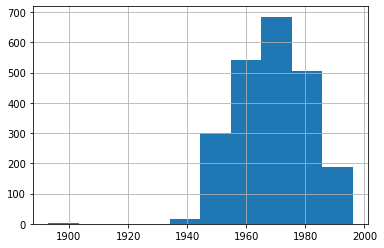

In [21]:
df.Year_Birth.hist()

In [22]:
df[df.Year_Birth == 1893]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
513,11004,1893,2n Cycle,Single,"$60,182.00",0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,60182.0,Single


1893 looks like Bad Data, the other data in the row is on the low end but may be valuable

#### Kidhome

In [23]:
df.Kidhome.value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

This data seems ordinary

#### Teenhome

In [24]:
df.Teenhome.value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

The data seems ordinary

#### Recency

In [26]:
df.Recency.value_counts()

56    37
54    32
30    32
46    31
49    30
      ..
58    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64

Since there are a lot of different values, let's look at the distribution

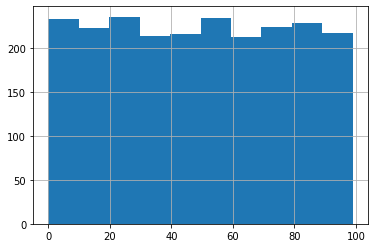

In [27]:
df.Recency.hist()

Surprisingly the data is very evenly distributed.  I would have expected a normalish distribution.

#### MntWines

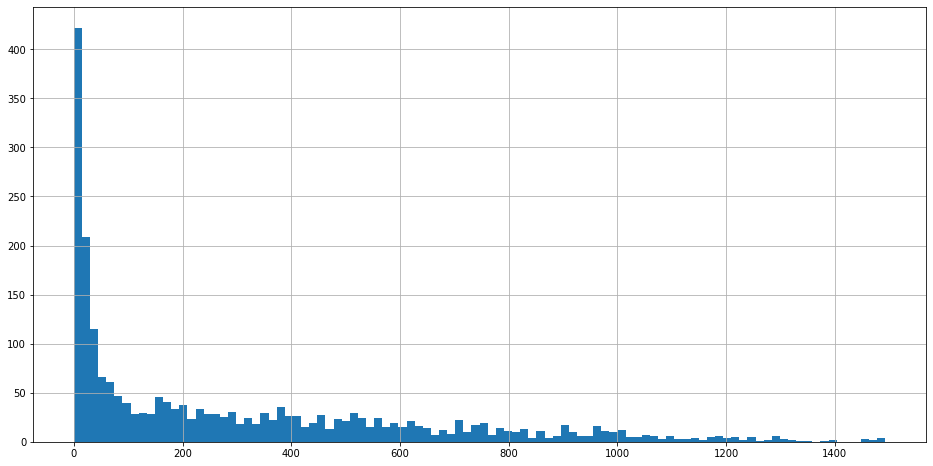

In [33]:
df.MntWines.hist(bins=100, figsize=(16, 8))

The distribution is highly skewed to the left

In [29]:
len(df[df.MntWines == 0])

13

Surprisingly only 13 customers didn't buy any wine in the last two years. Given the high amount of customers in the lowest bin.

In [36]:
len(df[df.MntWines < 10])

312

Wine must be inexpensive for this set of customers if there are bottles of wine that 312 of the customers could have purchased in the last 2 years.

#### MntFruits

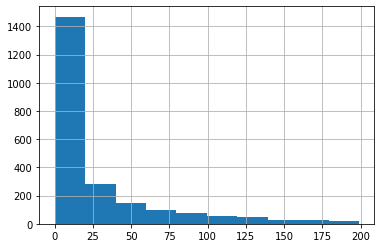

In [37]:
df.MntFruits.hist()

The data looks ordinary

#### MntMeatProducts

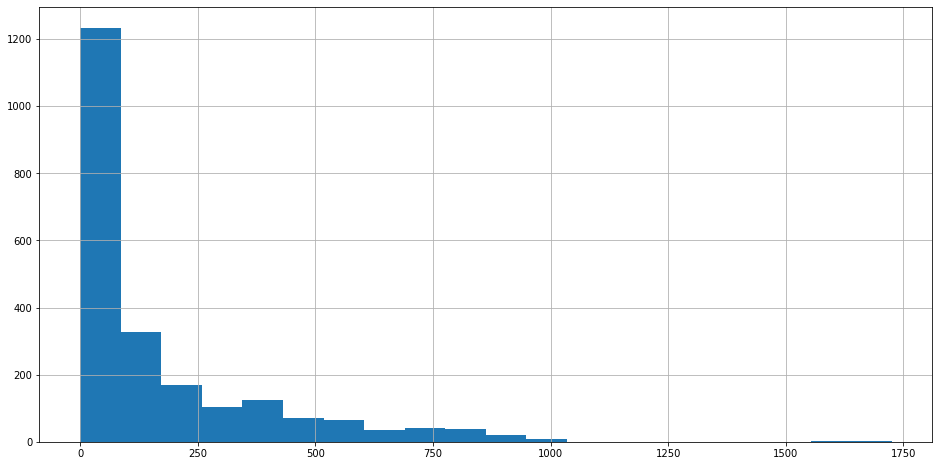

In [43]:
df.MntMeatProducts.hist(bins=20, figsize=(16, 8))

The max values need investigated because there is such a large gap between them and the next group.

In [46]:
df[df.MntMeatProducts > 1000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
325,4931,1977,Graduation,Together,"$157,146.00",0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA,157146.0,Together
497,1501,1982,PhD,Married,"$160,803.00",0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,160803.0,Married
961,5376,1979,Graduation,Married,"$2,447.00",1,0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0,US,2447.0,Married
1213,8720,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,0,IND,NaN,Together
2204,8475,1973,PhD,Married,"$157,243.00",0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND,157243.0,Married


These 5 customers spent a lot of money on meat, but small amounts on everything else. This seems odd, but maybe some of these customers make large purchases for special events and little otherwise.

#### MntFishProducts

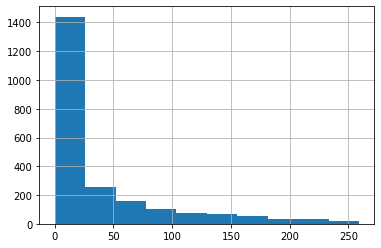

In [47]:
df.MntFishProducts.hist()

This data look ordinary.

#### MntSweetProducts

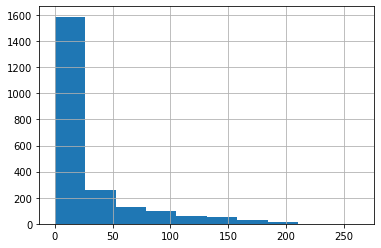

In [48]:
df.MntSweetProducts.hist()

Let's take a closer look at the biggest purchasers.

In [49]:
df[df.MntSweetProducts > 200]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
210,4619,1945,PhD,Single,"$113,734.00",0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,SP,113734.0,Single
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,NaN,Single


These two customers look to just really like sweets.

#### MntGoldProducts

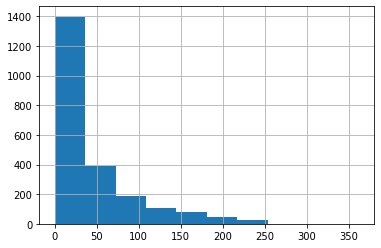

In [51]:
df.MntGoldProds.hist()

Let's look at the biggest purchasers.

In [52]:
df[df.MntGoldProds > 250]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
14,10311,1969,Graduation,Married,"$4,428.00",0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,0,SP,4428.0,Married
60,4246,1982,Master,Single,"$6,560.00",0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,0,SP,6560.0,Single
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,NaN,Single
2063,6237,1966,PhD,Single,"$7,144.00",0,2,2013-12-07,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,0,SP,7144.0,Single


One of these customers is one of the two that bought a lot of sweets, but other than that the data seems valid.

#### NumDealsPurchases

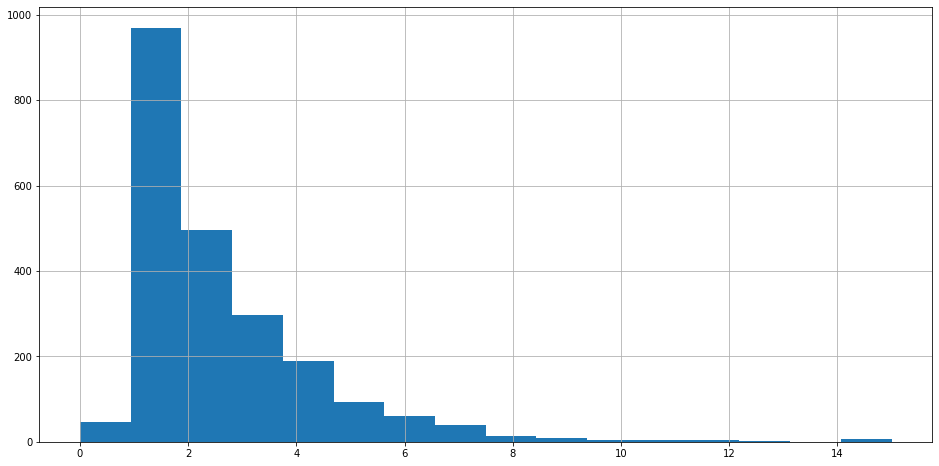

In [55]:
df.NumDealsPurchases.hist(bins=16, figsize=(16, 8))

Let's look at the highest values.

In [56]:
df[df.NumDealsPurchases > 10]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
26,5430,1956,Graduation,Together,"$54,450.00",1,1,2012-09-14,0,454,0,171,8,19,32,12,9,2,8,8,0,0,0,0,0,0,0,SP,54450.0,Together
27,8432,1956,Graduation,Together,"$54,450.00",1,1,2012-09-14,0,454,0,171,8,19,32,12,9,2,8,8,0,0,0,0,0,0,0,SP,54450.0,Together
105,4491,1949,Master,Married,"$62,845.00",1,1,2012-10-01,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,0,0,SP,62845.0,Married
106,873,1949,Master,Married,"$62,845.00",1,1,2012-10-01,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,1,0,SP,62845.0,Married
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,NaN,Married
334,3678,1973,Graduation,Widow,"$60,208.00",1,1,2012-10-07,13,488,23,71,15,0,59,11,8,3,7,7,0,1,0,0,0,1,0,SP,60208.0,Widow
471,2408,1976,Graduation,Married,"$58,597.00",1,1,2012-11-20,20,490,0,184,10,28,21,12,7,4,9,7,0,0,0,0,0,0,0,IND,58597.0,Married
497,1501,1982,PhD,Married,"$160,803.00",0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,160803.0,Married
604,1081,1957,PhD,Married,"$75,283.00",1,2,2013-03-27,26,733,9,180,12,19,66,11,6,3,5,4,0,0,0,0,0,0,0,SA,75283.0,Married
663,9931,1963,PhD,Married,"$4,023.00",1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0,SP,4023.0,Married


The data looks ordinary.

####    NumWebPurchases

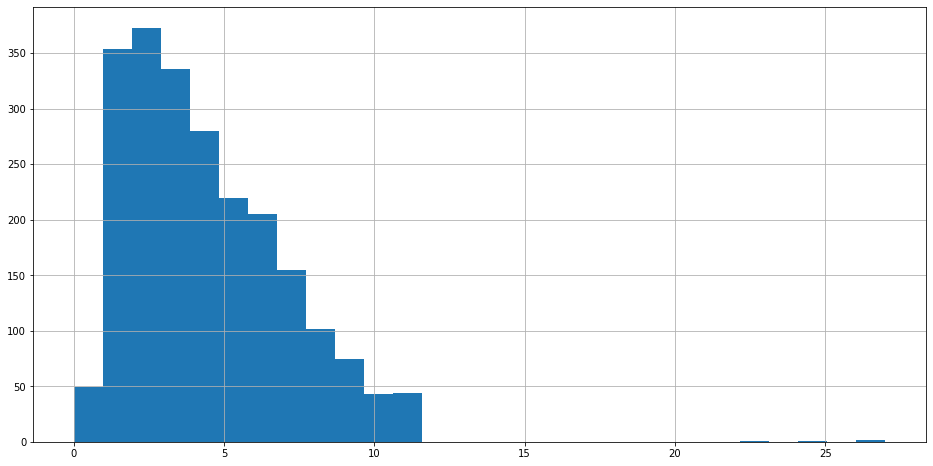

In [58]:
df.NumWebPurchases.hist(bins=28, figsize=(16, 8))

Let's look at the highest values.

In [59]:
df[df.NumWebPurchases > 11]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
14,10311,1969,Graduation,Married,"$4,428.00",0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,0,SP,4428.0,Married
210,4619,1945,PhD,Single,"$113,734.00",0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,SP,113734.0,Single
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,NaN,Single
2063,6237,1966,PhD,Single,"$7,144.00",0,2,2013-12-07,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,0,SP,7144.0,Single


This set of customers also contains some of the outlier customers from Sweets and Gold, but other than that they look ordinary.

#### NumCatalogPurchases

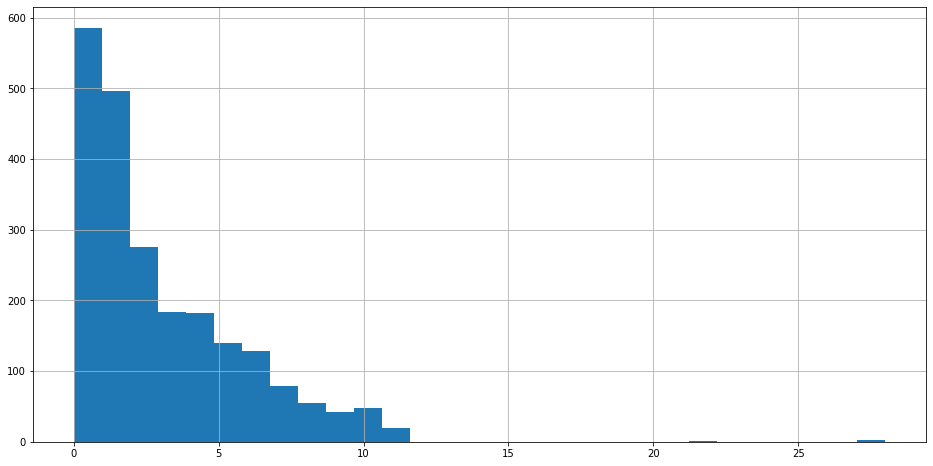

In [61]:
df.NumCatalogPurchases.hist(bins=29, figsize=(16, 8))

In [62]:
df[df.NumCatalogPurchases > 11]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
325,4931,1977,Graduation,Together,"$157,146.00",0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA,157146.0,Together
497,1501,1982,PhD,Married,"$160,803.00",0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,160803.0,Married
961,5376,1979,Graduation,Married,"$2,447.00",1,0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0,US,2447.0,Married
2204,8475,1973,PhD,Married,"$157,243.00",0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND,157243.0,Married


The customers that made a lot of catalog purchases also bought a lot of meat, but there doesn't seem to be a reason to disregard the data.

#### NumStorePurchases

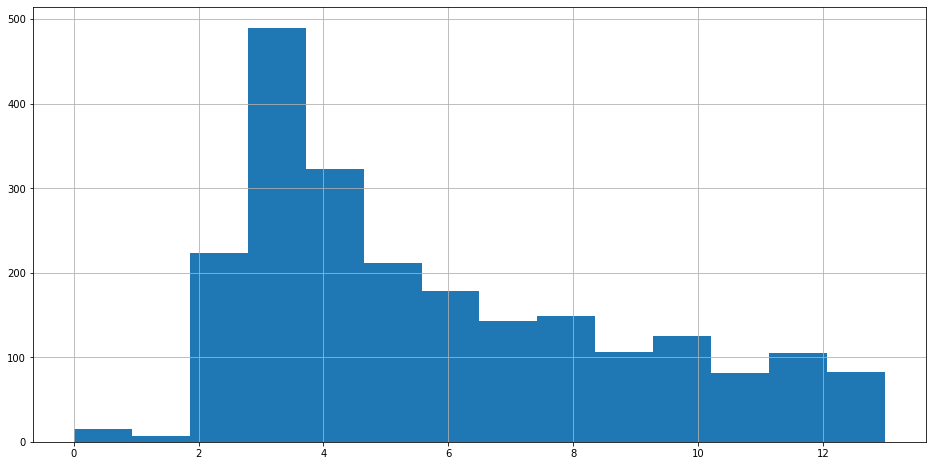

In [64]:
df.NumStorePurchases.hist(bins=14, figsize=(16, 8))

Let's look at the customers that made 0 or 1 store purchases.

In [65]:
df[df.NumStorePurchases < 2]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
14,10311,1969,Graduation,Married,"$4,428.00",0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,0,SP,4428.0,Married
60,4246,1982,Master,Single,"$6,560.00",0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,0,SP,6560.0,Single
210,4619,1945,PhD,Single,"$113,734.00",0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,SP,113734.0,Single
299,9303,1976,Graduation,Married,"$5,305.00",0,1,2013-07-30,12,12,4,7,1,3,5,0,1,0,0,13,0,0,0,0,0,0,0,IND,5305.0,Married
325,4931,1977,Graduation,Together,"$157,146.00",0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA,157146.0,Together
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,NaN,Single
456,3955,1965,Graduation,Divorced,"$4,861.00",0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,0,SA,4861.0,Divorced
497,1501,1982,PhD,Married,"$160,803.00",0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,160803.0,Married
663,9931,1963,PhD,Married,"$4,023.00",1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0,SP,4023.0,Married
731,1503,1976,PhD,Together,"$162,397.00",1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP,162397.0,Together


This data includes the catalog shoppers that have shown up as outliers in other categories, but the data seems ordinary.

#### NumWebVisitsMonth

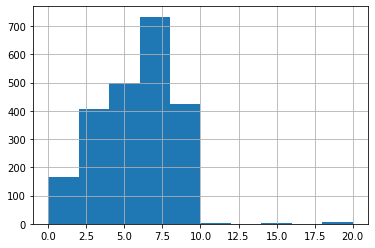

In [66]:
df.NumWebVisitsMonth.hist()

Let's look at the highest values.

In [67]:
df[df.NumWebVisitsMonth > 10]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
60,4246,1982,Master,Single,"$6,560.00",0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,0,SP,6560.0,Single
299,9303,1976,Graduation,Married,"$5,305.00",0,1,2013-07-30,12,12,4,7,1,3,5,0,1,0,0,13,0,0,0,0,0,0,0,IND,5305.0,Married
456,3955,1965,Graduation,Divorced,"$4,861.00",0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,0,SA,4861.0,Divorced
663,9931,1963,PhD,Married,"$4,023.00",1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0,SP,4023.0,Married
1291,11110,1973,Graduation,Single,"$3,502.00",1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,IND,3502.0,Single
1416,10749,1991,Graduation,Single,"$8,028.00",0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,0,SP,8028.0,Single
1466,6862,1971,Graduation,Divorced,"$1,730.00",0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,0,SP,1730.0,Divorced
1533,5899,1950,PhD,Together,"$5,648.00",1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,US,5648.0,Together
1721,4303,1957,PhD,Together,"$6,835.00",0,1,2012-12-08,76,107,2,12,2,2,12,0,0,0,1,20,0,0,0,0,0,0,0,CA,6835.0,Together


They look like they browse websites a lot but don't buy very often.

#### AcceptedCmp3

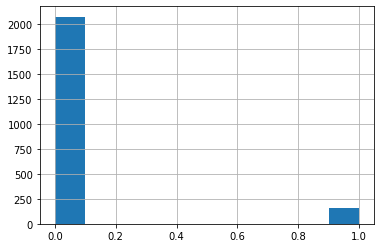

In [68]:
df.AcceptedCmp3.hist()

The data looks valid, although it was not a successful campaign.

#### AcceptedCmp4

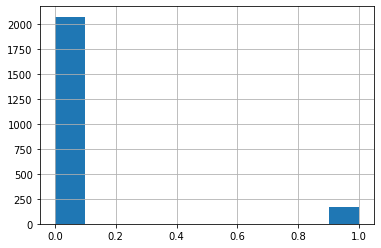

In [69]:
df.AcceptedCmp4.hist()

Again, valid data, but an unsuccessful campaign.

#### AcceptedCmp5

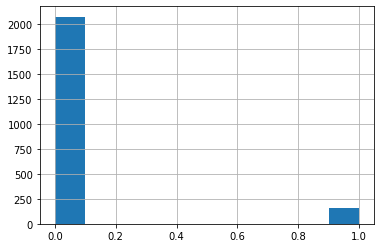

In [70]:
df.AcceptedCmp5.hist()

Valid looking data.

#### AcceptedCmp1

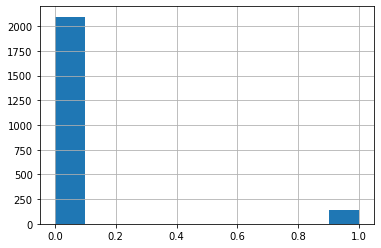

In [71]:
df.AcceptedCmp1.hist()

Valid looking data.

#### AcceptedCmp2

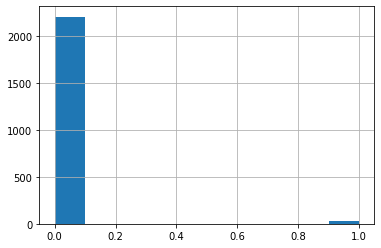

In [72]:
df.AcceptedCmp2.hist()

Valid looking data.

#### Repsonse

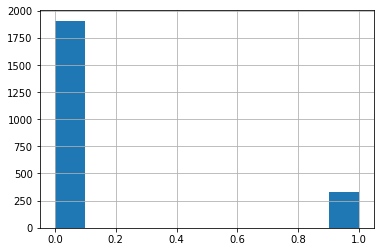

In [73]:
df.Response.hist()

Valid looking data

#### Complain

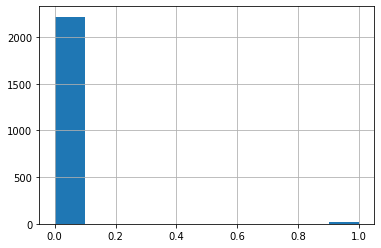

In [74]:
df.Complain.hist()

Valid looking data.

#### IncomeDollars

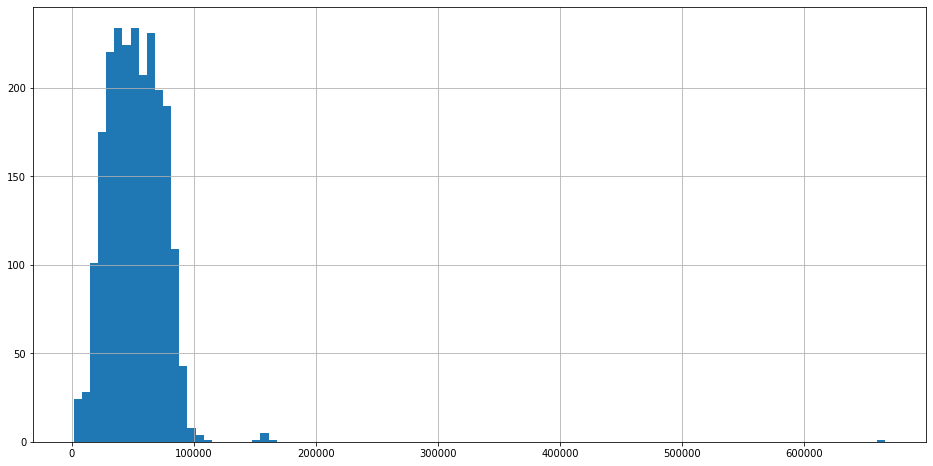

In [90]:
df.Income_Dollars.hist(bins=100, figsize=(16, 8))

There are some very high incomes.  Let's look at them.

In [78]:
df[df.Income_Dollars > 100000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
142,10089,1974,Graduation,Divorced,"$102,692.00",0,0,2013-04-05,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,1,0,SA,102692.0,Divorced
210,4619,1945,PhD,Single,"$113,734.00",0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,SP,113734.0,Single
325,4931,1977,Graduation,Together,"$157,146.00",0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA,157146.0,Together
497,1501,1982,PhD,Married,"$160,803.00",0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,160803.0,Married
527,9432,1977,Graduation,Together,"$666,666.00",1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA,666666.0,Together
731,1503,1976,PhD,Together,"$162,397.00",1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP,162397.0,Together
832,4611,1970,Graduation,Together,"$105,471.00",0,0,2013-01-21,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,1,0,SP,105471.0,Together
853,5336,1971,Master,Together,"$157,733.00",1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP,157733.0,Together
1244,2798,1977,PhD,Together,"$102,160.00",0,0,2012-11-02,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,1,0,SA,102160.0,Together
1564,7215,1983,Graduation,Single,"$101,970.00",0,0,2013-03-12,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,1,0,CA,101970.0,Single


Except for the very high income ($666,666.00) compared to the other customers, the data in that instance looks reasonable.

### Handle Missing Data

The only columns with missing data are Income and Income_Dollars. Income was converted to Income_Dollars during cleaning so its missing values can remain, but Income_Dollars will need to be dealt with.

In [80]:
df.Income_Dollars.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income_Dollars, dtype: float64

In [83]:
df[df.Income_Dollars.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income_Dollars,Marital_Status_Clean
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,NaN,Married
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US,NaN,Married
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS,NaN,Together
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS,NaN,Single
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA,NaN,Married
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER,NaN,Married
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US,NaN,Together
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER,NaN,Single
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS,NaN,Single
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS,NaN,Together


Nothing stands out as a pattern among the rows with no Income value.

While a more complicated method of imputing the values could be done, given the small amount of the rows, I think imputing a single value will be fine.  Because the income values are skewed left, I will use the Median.

In [85]:
mask = df[df.Income_Dollars.isna()].index

In [86]:
df.loc[mask, 'Income_Dollars'] = df.Income_Dollars.median()

In [89]:
df.Income_Dollars.describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income_Dollars, dtype: float64

### Validate the Cleaned Dataset

The dataset wasn't changed much, so it remains valid as far as can be known at this point in understanding the data.

## Explore the Dataset

### What is the response to each of the six campaigns?

In [91]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
             'AcceptedCmp5', 'Response']

In [93]:
for campaign in campaigns:
    response_rate = round(len(df[df[campaign] == 1]) / len(df) * 100, 2)
    print(f'The respose rate for campaign {campaign} is {response_rate}%')

The respose rate for campaign AcceptedCmp1 is 6.43%
The respose rate for campaign AcceptedCmp2 is 1.34%
The respose rate for campaign AcceptedCmp3 is 7.28%
The respose rate for campaign AcceptedCmp4 is 7.46%
The respose rate for campaign AcceptedCmp5 is 7.28%
The respose rate for campaign Response is 14.91%


The most recent campaign did twice as well as the best of the others.  We don't know anything about the campaigns, but that is a significant improvement.

What is the correlation if any among the campaigns?

In [95]:
df[campaigns].corr()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
AcceptedCmp1,1.000000,0.175315,0.094751,0.251300,0.403078,0.293982
AcceptedCmp2,0.175315,1.000000,0.072020,0.292210,0.221533,0.169293
AcceptedCmp3,0.094751,0.072020,1.000000,-0.079512,0.080316,0.254258
AcceptedCmp4,0.251300,0.292210,-0.079512,1.000000,0.306526,0.177019
AcceptedCmp5,0.403078,0.221533,0.080316,0.306526,1.000000,0.326634
Response,0.293982,0.169293,0.254258,0.177019,0.326634,1.000000


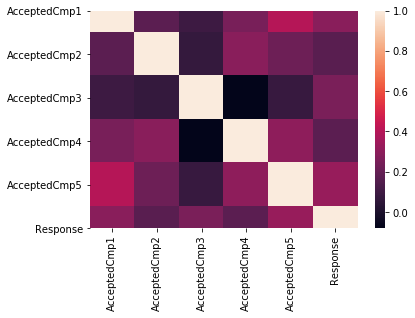

In [102]:
ax = sns.heatmap(df[campaigns].corr())

There is little correlation among the campaigns.

The best are:
* 1 and 5
* 4 and 5
* 5 and Response

But they are between 0.3 and 0.4 which is a low correlation.

A low correlation is not necessarily bad.  The campaigns could be directed at non-overlapping sets of customers.

### What is the correlation among all the columns?

Text(0.5, 1, 'Correlation Heatmap')

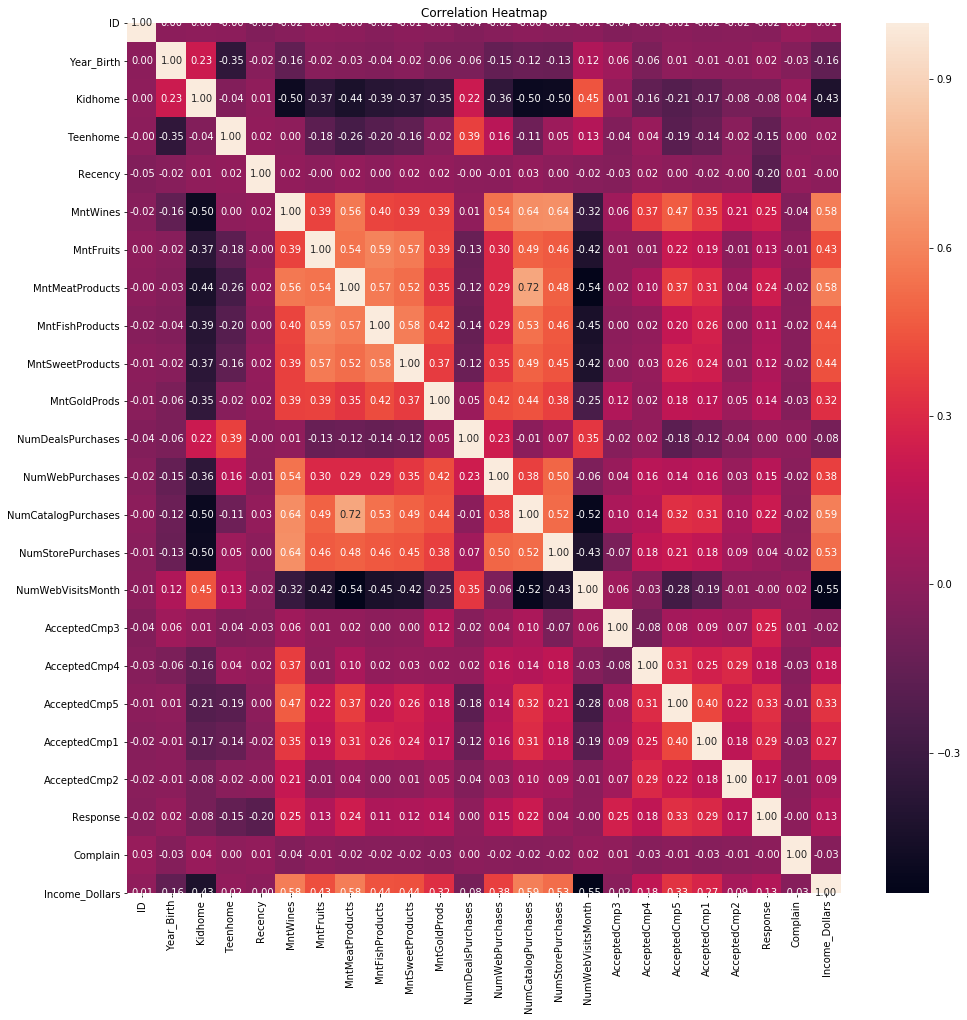

In [127]:
plt.figure(figsize=(16, 16))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f')
ax.set_title('Correlation Heatmap')